In [18]:
%config InlineBackend.figure_formats = ['svg']

In [19]:
import pandas as pd
import oscovida as ov

In [20]:
data = ov.fetch_data_germany()

In [21]:
data.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
date,,,,,,,,,,,,,,,,,,
2020-03-14,25793576,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
2020-03-19,25793577,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2020-03-19,25793578,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
2020-03-21,25793579,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2020-03-27,25793580,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,1001,"01.08.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [222]:
df4 = data.groupby(["Landkreis", "date"]).agg({'AnzahlFall': 'sum'})
#df4.loc["LK Pinneberg"].plot()

In [223]:
df5 = df4.groupby([pd.Grouper(level='Landkreis'), 
                   pd.Grouper(level='date', freq='7D')]
                  ).sum()

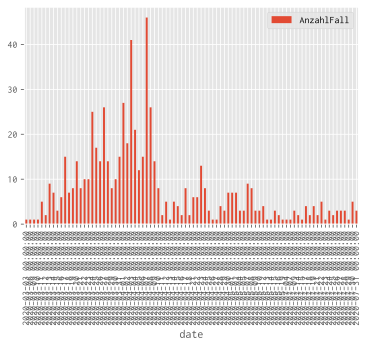

In [212]:
df5.loc["LK Pinneberg"].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa8261dbb0>]],
      dtype=object)

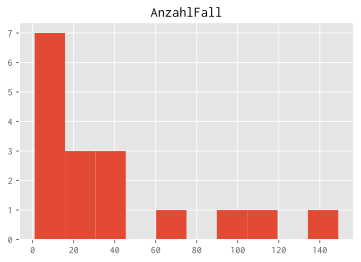

In [224]:
df5.loc["LK Pinneberg"].hist()

In [230]:
df5

AnzahlFall
Landkreis          date                  
LK Ahrweiler       2020-03-10          14
                   2020-03-17          35
                   2020-03-24          21
                   2020-03-31          31
                   2020-04-07          11
...                                   ...
StadtRegion Aachen 2020-06-30           8
                   2020-07-07          11
                   2020-07-14          19
                   2020-07-21          27
                   2020-07-28          28

[7606 rows x 1 columns]

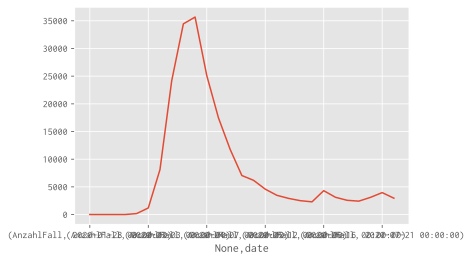

In [234]:
df6 = df5.unstack().T
df6.sum(axis=1).plot()

In [276]:
# compute bins for histograms
import numpy as np

data_max_value = int(df6.max().max())
bins_max_value = 400
bins_width = 10
nbins = bins_max_value // bins_width + 1
print(f"Using {nbins} bins")
# equidistant bins
bins0 = np.linspace(0, nbins * bins_width, nbins + 1)
# add a bin for zero to 1 at the beginning
bins1 = [0] + list(bins0)
bins1[1] = 1
assert bins1[0] == 0
assert bins1[1] == 1
assert bins1[2] == bins_width


bins = bins1

# for later: add large boundary at right
assert bins[-1] > bins_max_value
# needed for histogram command
bins_with_right_edge = list(bins)+[bins[-1] + bins_width]
# bins_with_right_edge = list(bins)+[bins_max_value + 1]
bins_with_right_edge[0:5]

Using 41 bins


[0, 1, 10.0, 20.0, 30.0]

In [277]:
# compute week of the year to place histogram
week_of_the_year = [x[1].week for x in df6.index[:]]
week_of_the_year_date = [x[1].strftime('%Y-%m-%d') for x in df6.index[:]]

In [278]:
list(zip(week_of_the_year, week_of_the_year_date))

[(5, '2020-01-28'),
 (6, '2020-02-04'),
 (7, '2020-02-11'),
 (8, '2020-02-18'),
 (9, '2020-02-25'),
 (10, '2020-03-03'),
 (11, '2020-03-10'),
 (12, '2020-03-17'),
 (13, '2020-03-24'),
 (14, '2020-03-31'),
 (15, '2020-04-07'),
 (16, '2020-04-14'),
 (17, '2020-04-21'),
 (18, '2020-04-28'),
 (19, '2020-05-05'),
 (20, '2020-05-12'),
 (21, '2020-05-19'),
 (22, '2020-05-26'),
 (23, '2020-06-02'),
 (24, '2020-06-09'),
 (25, '2020-06-16'),
 (26, '2020-06-23'),
 (27, '2020-06-30'),
 (28, '2020-07-07'),
 (29, '2020-07-14'),
 (30, '2020-07-21'),
 (31, '2020-07-28')]

In [279]:
# drop last week??

In [320]:
# suitable colours
def my_colours(n, alpha=0.1):
    import matplotlib
    #colours = matplotlib.pyplot.cm.rainbow(np.linspace(0, 1, n), alpha=alpha)
    #colours = matplotlib.pyplot.cm.RdYlGn(np.linspace(0, 1, n), alpha=alpha)
    colours = list(reversed(matplotlib.pyplot.cm.autumn(np.linspace(0, 1, n), alpha=alpha)))
    # first colour green
    colours[0] = [0, 1, 0, 1.0 + 0*alpha]
 
    return colours

print(my_colours(50))

[[0, 1, 0, 1.0], array([1.        , 0.98039216, 0.        , 0.1       ]), array([1.        , 0.96078431, 0.        , 0.1       ]), array([1.        , 0.94117647, 0.        , 0.1       ]), array([1.        , 0.92156863, 0.        , 0.1       ]), array([1.        , 0.89803922, 0.        , 0.1       ]), array([1.        , 0.87843137, 0.        , 0.1       ]), array([1.        , 0.85882353, 0.        , 0.1       ]), array([1.        , 0.83921569, 0.        , 0.1       ]), array([1.        , 0.81568627, 0.        , 0.1       ]), array([1.        , 0.79607843, 0.        , 0.1       ]), array([1.        , 0.77647059, 0.        , 0.1       ]), array([1.        , 0.75686275, 0.        , 0.1       ]), array([1.       , 0.7372549, 0.       , 0.1      ]), array([1.        , 0.71372549, 0.        , 0.1       ]), array([1.        , 0.69411765, 0.        , 0.1       ]), array([1.       , 0.6745098, 0.       , 0.1      ]), array([1.        , 0.65490196, 0.        , 0.1       ]), array([1.        , 0.6

found 27 data sets
5 0 2.0
6 1 2.0
7 2 1.0
8 3 2.0
9 4 83.0
10 5 247.0
11 6 392.0
12 7 1082.0
13 8 1356.0
14 9 1197.0
15 10 744.0
16 11 509.0
17 12 405.0
18 13 285.0
19 14 230.0
20 15 166.0
21 16 123.0
22 17 167.0
23 18 143.0
24 19 123.0
25 20 1128.0
26 21 365.0
27 22 138.0
28 23 108.0
29 24 125.0
30 25 190.0
31 26 72.0


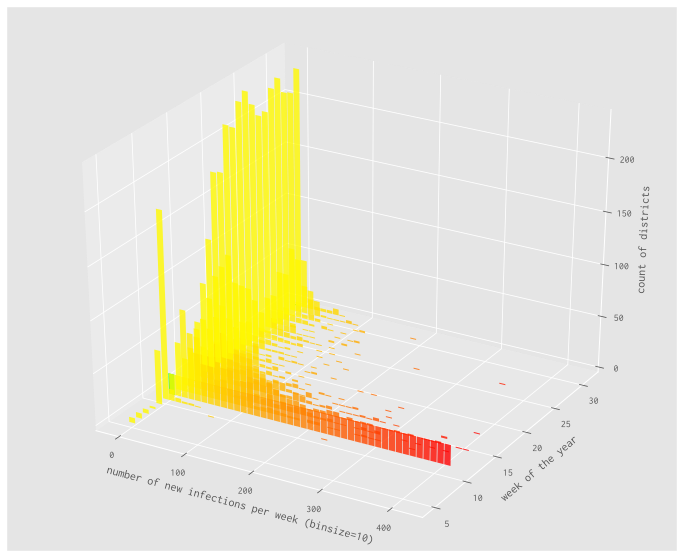

In [321]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
n = len(week_of_the_year)
print(f"found {n} data sets")
last_n_weeks = n
for c, z, i in zip(my_colours(last_n_weeks), week_of_the_year[-last_n_weeks:], range(n-last_n_weeks, n)):
    print(z, i, df6.iloc[i, :].max())
    xs = bins
    count, bins_ = np.histogram(df6.iloc[i,:], bins=bins_with_right_edge)
    if i == 6:
        count = len(xs) * [20]
    ys = count

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs = my_colours(len(xs))
    # cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8, width=0.9*bins_width)

ax.set_xlabel(f'number of new infections per week (binsize={bins_width})')
ax.set_zlabel('count of districts')
ax.set_ylabel('week of the year')

plt.show()

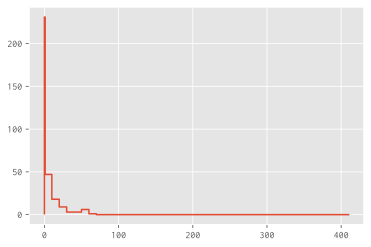

In [314]:
matplotlib.pyplot.step(bins, count)

In [172]:
import matplotlib

In [173]:
matplotlib.axes.Axes.bar()

TypeError: inner() missing 1 required positional argument: 'ax'

In [247]:
count

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [149]:
xs.shape

(20,)

In [150]:
ys.shape

(20,)

In [159]:
bins_with_right_edge = list(bins)+[bins[-1] + bins_width]

In [160]:
count, bins_ = np.histogram(df6.iloc[26,:], bins=bins_with_right_edge)

In [161]:
count.shape

(69,)

In [163]:
bins_.shape

(70,)

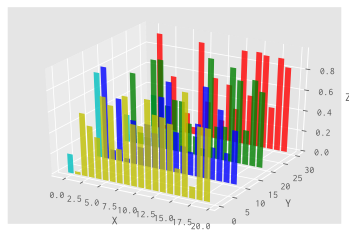

In [107]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

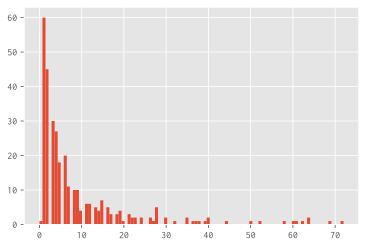

In [80]:
df6.iloc[-1, :].hist(bins=100)

In [69]:
np.histogram(df6.iloc[25, :])

ValueError: autodetected range of [nan, nan] is not finite

In [55]:
np.array(df5.unstack())a

array([[nan, nan, nan, ...,  6.,  3.,  1.],
       [nan, nan, nan, ...,  2.,  7.,  1.],
       [nan, nan, nan, ...,  8.,  6.,  1.],
       ...,
       [nan, nan, nan, ...,  3.,  2.,  2.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., 19., 27., 28.]])